In this project we will build a multinomial regression model and then predict. 
To start the project, we imported the data and all the necessary libraries. In the second step, we isnpected the data. we looked for null and duplicated values and none were found. In third step, we assigned numerical values to the three categorical varibales and then changed it data type.  In fourth step, we assigned x and y values to our dependent and independent variables. In fifth stage, we trained, built our model and then predicted values. In sixth step, we evaluate the model by using R2 and confusion matrix and both showed that the model is a good fit. In last stage, we interpreted the results of the model. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

## Importing Data 

In [2]:
df= pd.read_csv(r"C:\Users\HP\Downloads\flower_data.csv")
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


## Inspecting the Data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#looking for duplicates
df.duplicated().sum()
#no duplicates found

np.int64(0)

In [6]:
#looking for null values
df.isna().sum()
#no null values found

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning the data

In [ ]:
#the dependent variable is a categorical variable, we will change it to categorical variable.

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
#we will assign numeircal values to these catgories and then we will change the type
df['Species']= df['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

C:\Users\HP\AppData\Local\Temp\ipykernel_10140\94782847.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species']= df['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [12]:
df['Species']=df['Species'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [14]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1


In [ ]:
#we have cleaned the data and now we will proceed to the next step.

## Assigning values

In [17]:
y= df['Species']
x= df.drop('Species', axis=1)

## Training the model

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [27]:
model.predict(x_test)

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1])

In [28]:
model.coef_

array([[-0.78693692, -0.33338042,  0.09565482, -0.69086567, -0.27380919],
       [-0.12191675,  0.14878127, -0.18091948,  0.08012575, -0.06761134],
       [ 0.90885368,  0.18459915,  0.08526466,  0.61073993,  0.34142054]])

In [29]:
model.intercept_

array([ 61.25656124,  23.28707912, -84.54364036])

## Evaluation of the Model

In [33]:
score = model.score(x_test, y_test)
print("Accuracy:", score)

Accuracy: 1.0


In [35]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [ ]:
#perfectly classified all the test data — none of the predictions were wrong.

In [37]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


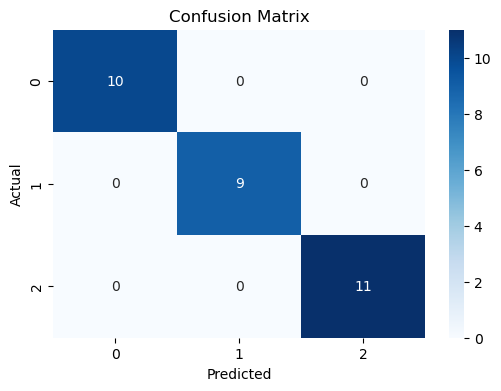

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#the confusion matrix also shows that the preidction of all values was correct

## Interpretation of the Results

In [ ]:
# we have three categories and SK learn has automaticlly selected Virginica as the base category
#so all the valeus will be compared to it

In [ ]:
(Setosa vs Virginica):
SepalLength (-0.787) → As sepal length increases, the odds of being Setosa (vs Virginica) decrease sharply.

SepalWidth (-0.333) → Wider sepals slightly reduce the odds of Setosa.

PetalLength (+0.096) → Longer petals slightly increase the odds of Setosa (very weak effect).

PetalWidth (-0.691) → Wider petals strongly decrease the odds of Setosa vs Virginica.

Feature5 (-0.274) → Negative, so larger values reduce the odds of Setosa.

 Overall: Setosa is more likely when petal/sepal dimensions are smaller — consistent with biology.

In [ ]:
(Versicolor vs Virginica)

SepalLength (-0.122) → Slightly decreases odds of Versicolor (vs Virginica).

SepalWidth (+0.149) → Slightly increases odds of Versicolor.

PetalLength (-0.181) → Longer petals slightly decrease odds of Versicolor.

PetalWidth (+0.080) → Wider petals slightly increase odds of Versicolor.

Feature5 (-0.068) → Small negative effect.

 Overall: Versicolor lies between Setosa and Virginica, showing a mixed pattern of feature effects.